In [39]:
provinces = ['BKK', 'Chiangmai', 'Khonkaen', 'Rayong', 'Saraburi', 'Surat']

In [40]:
import pandas as pd

In [41]:

def format_datetime(df):
  df['date_time'] = pd.to_datetime(df['date_time'])
  df = df.set_index('date_time')
  return df

In [42]:
def format_datetime_2(df):
    df['date_time'] = pd.to_datetime(df['date_time'] , format='%d/%m/%Y %H:%M')
    df = df.set_index('date_time')
    return df

In [43]:
def replaceOutlier(df):
    # replace the outliers with their boundary
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    IQR = Q3 - Q1
    left_boundary = Q1 - 1.5*IQR
    right_boundary = Q3 + 1.5*IQR
    df_no_out = df 
    df_no_out[df.columns] = df.clip(left_boundary,right_boundary,axis=1)
    return df_no_out

In [44]:
def get_train_data(prov):
  df_train = pd.read_csv(prov + '/train/' + prov.lower() + '_train.csv')
  df_temp_surface = pd.read_csv(prov + '/train/' + prov.lower() + '_temp_surface.csv')
  df_weather_wind = pd.read_csv(prov + '/train/' + prov.lower() + '_weather_wind.csv')
  df_so2 = pd.read_csv(prov + '/train/' + prov.lower() + '_so2_surface_train.csv')
  df_rh = pd.read_csv(prov + '/train/' + prov.lower() + '_RH_train.csv')
  df_train = df_train.rename(columns={'Unnamed: 0':'date_time'})
  df_train, df_temp_surface, df_weather_wind, df_so2, df_rh = format_datetime(df_train), format_datetime(df_temp_surface), format_datetime(df_weather_wind), format_datetime(df_so2), format_datetime(df_rh)
  df_train, df_temp_surface, df_weather_wind, df_so2, df_rh = df_train.interpolate(), df_temp_surface.interpolate(), df_weather_wind.interpolate(), df_so2.interpolate(), df_rh.interpolate()
  df_train, df_temp_surface, df_weather_wind, df_so2, df_rh = df_train.resample('h').ffill(), df_temp_surface.resample('h').ffill(), df_weather_wind.resample('h').ffill(), df_so2.resample('h').ffill(), df_rh.resample('h').ffill()
  df_train, df_temp_surface, df_weather_wind, df_so2, df_rh = replaceOutlier(df_train), replaceOutlier(df_temp_surface), replaceOutlier(df_weather_wind), replaceOutlier(df_so2), replaceOutlier(df_rh)
  return df_train, df_temp_surface, df_weather_wind, df_so2, df_rh

In [45]:
def get_test_data(prov):
  df_test = pd.read_csv(f'{prov}/test/{prov.lower()}_test.csv')
  df_temp_surface_test = pd.read_csv(f'{prov}/test/{prov.lower()}_temp_surface_test.csv')
  df_weather_wind_test = pd.read_csv(f'{prov}/test/{prov.lower()}_weather_wind_test.csv')
  df_so2_test = pd.read_csv(prov + '/test/' + prov.lower() + '_so2_surface_test.csv')
  df_rh_test = pd.read_csv(prov + '/test/' + prov.lower() + '_RH_test.csv')
  df_test = df_test.rename(columns={'Unnamed: 0':'date_time'})
  df_test, df_temp_surface_test, df_weather_wind_test, df_so2_test, df_rh_test = format_datetime(df_test), format_datetime_2(df_temp_surface_test), format_datetime_2(df_weather_wind_test),format_datetime(df_so2_test),format_datetime(df_rh_test)
  df_test, df_temp_surface_test, df_weather_wind_test, df_so2_test, df_rh_test = df_test.interpolate(), df_temp_surface_test.interpolate(), df_weather_wind_test.interpolate(), df_so2_test.interpolate(), df_rh_test.interpolate()
  df_test, df_temp_surface_test,df_weather_wind_test, df_so2_test, df_rh_test = df_test.resample('h').ffill(), df_temp_surface_test.resample('h').ffill(), df_weather_wind_test.resample('h').ffill(), df_so2_test.resample('h').ffill(), df_rh_test.resample('h').ffill()
  df_test, df_temp_surface_test, df_weather_wind_test, df_so2_test, df_rh_test = replaceOutlier(df_test), replaceOutlier(df_temp_surface_test), replaceOutlier(df_weather_wind_test),replaceOutlier(df_so2_test),replaceOutlier(df_rh_test)
  return df_test, df_temp_surface_test, df_weather_wind_test, df_so2_test, df_rh_test

In [46]:
def get_na_rows(df, col):
  return df[df[col].isna() == True].index.to_list()

In [47]:
df_train, df_temp_surface, df_weather_wind, df_so2, df_rh = get_train_data('Rayong')
df_test, df_temp_surface_test, df_weather_wind_test, df_so2_test, df_rh_test = get_test_data('Rayong')

C:\Users\jinnie\AppData\Local\Temp\ipykernel_1736\835860302.py:9: FutureWarning: Downcasting integer-dtype results in .where is deprecated and will change in a future version. To retain the old behavior, explicitly cast the results to the desired dtype.
  df_no_out[df.columns] = df.clip(left_boundary,right_boundary,axis=1)


In [48]:
display(df_test.tail())
display(df_temp_surface_test.tail())
display(df_weather_wind_test.tail())
display(df_so2_test.tail())
display(df_rh_test.tail())

,PM2.5
date_time,
2021-07-01 19:00:00,16.0
2021-07-01 20:00:00,16.0
2021-07-01 21:00:00,16.0
2021-07-01 22:00:00,16.0
2021-07-01 23:00:00,16.0


,temp
date_time,
2021-07-01 18:00:00,29.9
2021-07-01 19:00:00,28.5
2021-07-01 20:00:00,28.5
2021-07-01 21:00:00,28.5
2021-07-01 22:00:00,28.2


,wind speed,wind dir
date_time,,
2021-07-01 18:00:00,21,255
2021-07-01 19:00:00,25,255
2021-07-01 20:00:00,25,255
2021-07-01 21:00:00,25,255
2021-07-01 22:00:00,24,245


,so2 (ug/m^3)
date_time,
2021-07-01 18:00:00,0.36
2021-07-01 19:00:00,0.55
2021-07-01 20:00:00,0.55
2021-07-01 21:00:00,0.55
2021-07-01 22:00:00,0.46


,RH
date_time,
2021-07-01 18:00:00,68.0
2021-07-01 19:00:00,74.0
2021-07-01 20:00:00,74.0
2021-07-01 21:00:00,74.0
2021-07-01 22:00:00,77.0


In [49]:
display(df_train.tail())
display(df_temp_surface.tail())
display(df_weather_wind.tail())
display(df_so2.tail())
display(df_rh.tail())

,PM2.5
date_time,
2020-06-30 19:00:00,11.0
2020-06-30 20:00:00,10.0
2020-06-30 21:00:00,9.0
2020-06-30 22:00:00,8.0
2020-06-30 23:00:00,7.0


,temp
date_time,
2020-06-30 18:00:00,28.0
2020-06-30 19:00:00,27.9
2020-06-30 20:00:00,27.9
2020-06-30 21:00:00,27.9
2020-06-30 22:00:00,28.5


,wind speed,wind dir
date_time,,
2020-06-30 18:00:00,41.0,265
2020-06-30 19:00:00,36.0,280
2020-06-30 20:00:00,36.0,280
2020-06-30 21:00:00,36.0,280
2020-06-30 22:00:00,47.0,270


,so2 (ug/m^3)
date_time,
2020-06-30 18:00:00,0.32
2020-06-30 19:00:00,0.36
2020-06-30 20:00:00,0.36
2020-06-30 21:00:00,0.36
2020-06-30 22:00:00,0.40


,RH
date_time,
2020-06-30 18:00:00,81.0
2020-06-30 19:00:00,81.0
2020-06-30 20:00:00,81.0
2020-06-30 21:00:00,81.0
2020-06-30 22:00:00,78.0


In [50]:
import matplotlib.pyplot as plt

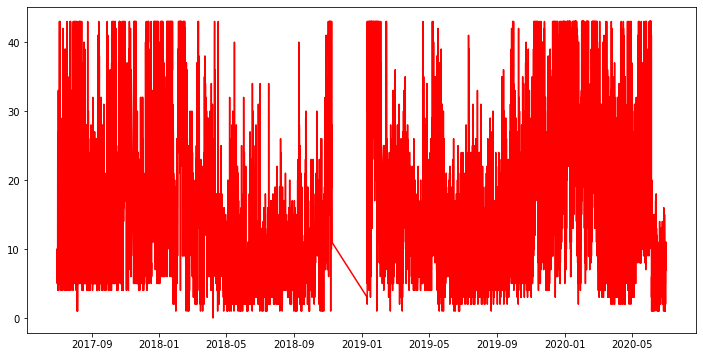

In [51]:
plt.figure(figsize=(12,6))
plt.plot(df_train,'r')

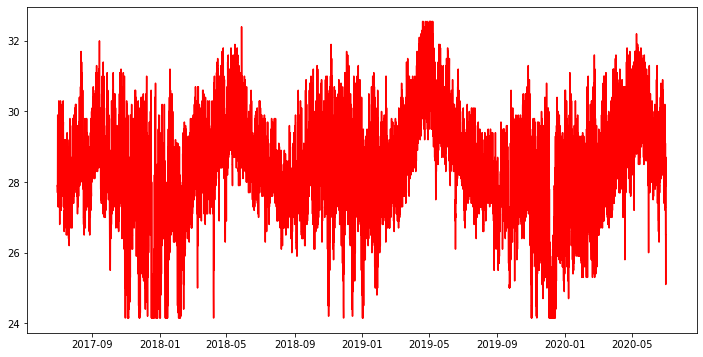

In [52]:
plt.figure(figsize=(12,6))
plt.plot(df_temp_surface,'r')

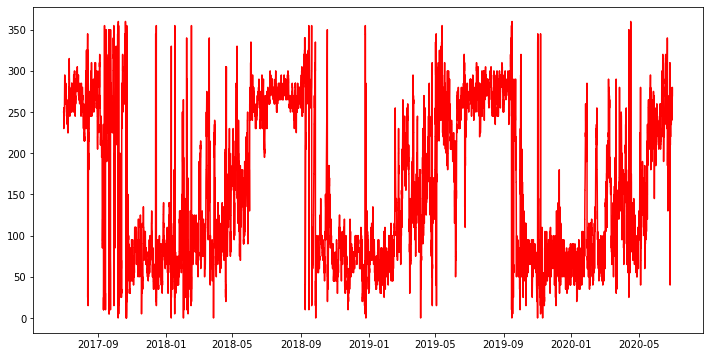

In [53]:
plt.figure(figsize=(12,6))
plt.plot(df_weather_wind['wind dir'],'r')

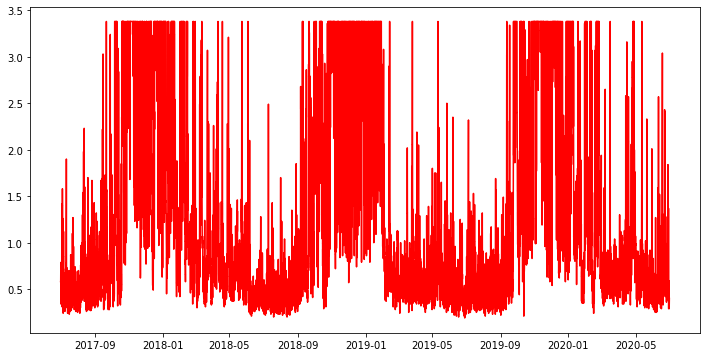

In [54]:
plt.figure(figsize=(12,6))
plt.plot(df_so2['so2 (ug/m^3)'],'r')

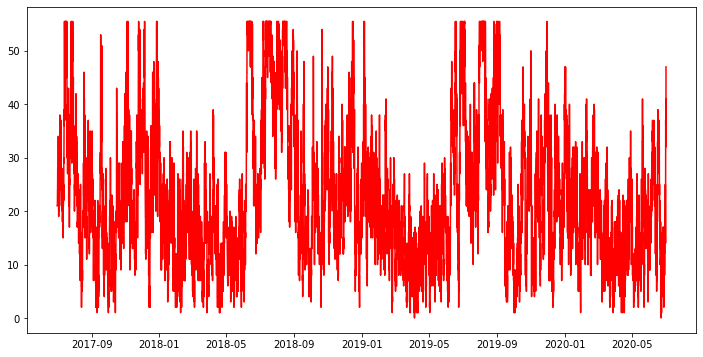

In [55]:
plt.figure(figsize=(12,6))
plt.plot(df_weather_wind['wind speed'],'r')

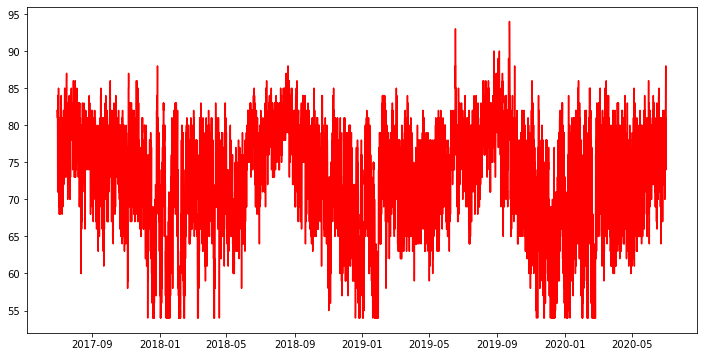

In [56]:
plt.figure(figsize=(12,6))
plt.plot(df_rh['RH'],'r')

In [57]:
df_temp_0 = pd.DataFrame({'date_time': ['07/01/2017 00:00:00'], 'temp':[0]})
df_temp_0 = format_datetime(df_temp_0)
df_wind_0 = pd.DataFrame({'date_time': ['07/01/2017 00:00:00'], 'wind dir':[0],'wind speed':[0]})
df_wind_0 = format_datetime(df_wind_0)
df_so2_0 = pd.DataFrame({'date_time': ['07/01/2017 00:00:00'], 'so2 (ug/m^3)':[0]})
df_so2_0 = format_datetime(df_so2_0)
df_rh_0 = pd.DataFrame({'date_time': ['07/01/2017 00:00:00'], 'RH':[0]})
df_rh_0 = format_datetime(df_rh_0)

In [58]:
df_temp_1 = pd.DataFrame({'date_time': ['06/30/2020 23:00:00'], 'temp':[df_temp_surface['temp'].iloc[26301]]})
df_temp_1 = format_datetime(df_temp_1)
df_wind_1 = pd.DataFrame({'date_time': ['06/30/2020 23:00:00'], 'wind dir':[df_weather_wind['wind dir'].iloc[26301]],'wind speed':[df_weather_wind['wind speed'].iloc[26301]]})
df_wind_1 = format_datetime(df_wind_1)
df_so2_1 = pd.DataFrame({'date_time': ['06/30/2020 23:00:00'], 'so2 (ug/m^3)':[df_so2['so2 (ug/m^3)'].iloc[26301]]})
df_so2_1 = format_datetime(df_so2_1)
df_rh_1 = pd.DataFrame({'date_time': ['06/30/2020 23:00:00'], 'RH':[df_rh['RH'].iloc[26301]]})
df_rh_1 = format_datetime(df_rh_1)

In [59]:
df_temp_surface = pd.concat([df_temp_0,df_temp_surface,df_temp_1])
df_weather_wind = pd.concat([df_wind_0,df_weather_wind,df_wind_1])
df_so2 = pd.concat([df_so2_0,df_so2,df_so2_1])
df_rh = pd.concat([df_rh_0,df_rh,df_rh_1])

In [60]:
data = df_train.merge(df_weather_wind,left_index=True,right_index=True)
data = data.merge(df_temp_surface,left_index=True,right_index=True)
data = data.merge(df_so2,left_index=True,right_index=True)
data = data.merge(df_rh,left_index=True,right_index=True)
data

,PM2.5,wind dir,wind speed,temp,so2 (ug/m^3),RH
date_time,,,,,,
2017-07-01 00:00:00,10.0,0,0.0,0.0,0.00,0.0
2017-07-01 01:00:00,6.0,250,21.0,27.9,0.58,82.0
2017-07-01 02:00:00,6.0,250,21.0,27.9,0.58,82.0
2017-07-01 03:00:00,5.0,250,21.0,27.9,0.58,82.0
2017-07-01 04:00:00,10.0,250,21.0,27.7,0.62,81.0
...,...,...,...,...,...,...
2020-06-30 19:00:00,11.0,280,36.0,27.9,0.36,81.0
2020-06-30 20:00:00,10.0,280,36.0,27.9,0.36,81.0
2020-06-30 21:00:00,9.0,280,36.0,27.9,0.36,81.0


In [61]:
df_temp_test_0 = pd.DataFrame({'date_time': ['07/01/2020 00:00:00'], 'temp':[0]})
df_temp_test_0 = format_datetime(df_temp_test_0)
df_wind_test_0 = pd.DataFrame({'date_time': ['07/01/2020 00:00:00'], 'wind dir':[0],'wind speed':[0]})
df_wind_test_0 = format_datetime(df_wind_test_0)
df_so2_test_0 = pd.DataFrame({'date_time': ['07/01/2020 00:00:00'], 'so2 (ug/m^3)':[0]})
df_so2_test_0 = format_datetime(df_so2_test_0)
df_rh_test_0 = pd.DataFrame({'date_time': ['07/01/2020 00:00:00'], 'RH':[0]})
df_rh_test_0 = format_datetime(df_rh_test_0)

In [62]:
df_temp_test_1 = pd.DataFrame({'date_time': ['07/01/2021 23:00:00'], 'temp':[df_temp_surface_test['temp'].iloc[8781]]})
df_temp_test_1 = format_datetime(df_temp_test_1)
df_wind_test_1 = pd.DataFrame({'date_time': ['07/01/2021 23:00:00'], 'wind dir':[df_weather_wind_test['wind dir'].iloc[8781]],'wind speed':[df_weather_wind_test['wind speed'].iloc[8781]]})
df_wind_test_1 = format_datetime(df_wind_test_1)
df_so2_test_1 = pd.DataFrame({'date_time': ['07/01/2021 23:00:00'], 'so2 (ug/m^3)':[df_so2_test['so2 (ug/m^3)'].iloc[8781]]})
df_so2_test_1 = format_datetime(df_so2_test_1)
df_rh_test_1 = pd.DataFrame({'date_time': ['07/01/2021 23:00:00'], 'RH':[df_rh_test['RH'].iloc[8781]]})
df_rh_test_1 = format_datetime(df_rh_test_1)

In [63]:
df_temp_surface_test = pd.concat([df_temp_test_0,df_temp_surface_test,df_temp_test_1])
df_weather_wind_test = pd.concat([df_wind_test_0,df_weather_wind_test,df_wind_test_1])
df_so2_test = pd.concat([df_so2_test_0,df_so2_test,df_so2_test_1])
df_rh_test = pd.concat([df_rh_test_0,df_rh_test,df_rh_test_1])

In [64]:
test = df_test.merge(df_temp_surface_test,left_index=True,right_index=True)
test['wind dir'] = df_weather_wind_test['wind dir'].values
test['wind speed'] = df_weather_wind_test['wind speed'].values
test = test.merge(df_so2_test,left_index=True,right_index=True)
test = test.merge(df_rh_test,left_index=True,right_index=True)
test

,PM2.5,temp,wind dir,wind speed,so2 (ug/m^3),RH
date_time,,,,,,
2020-07-01 00:00:00,5.0,0.0,0,0,0.00,0.0
2020-07-01 01:00:00,3.0,28.2,260,41,0.47,78.0
2020-07-01 02:00:00,2.0,28.2,260,41,0.47,78.0
2020-07-01 03:00:00,4.0,28.2,260,41,0.47,78.0
2020-07-01 04:00:00,3.0,27.8,260,46,0.56,78.0
...,...,...,...,...,...,...
2021-07-01 19:00:00,16.0,28.5,255,25,0.55,74.0
2021-07-01 20:00:00,16.0,28.5,255,25,0.55,74.0
2021-07-01 21:00:00,16.0,28.5,255,25,0.55,74.0


In [65]:
data2 = replaceOutlier(data)
data2.head()

,PM2.5,wind dir,wind speed,temp,so2 (ug/m^3),RH
date_time,,,,,,
2017-07-01 00:00:00,10.0,0,0.0,24.15,0.00,54.0
2017-07-01 01:00:00,6.0,250,21.0,27.90,0.58,82.0
2017-07-01 02:00:00,6.0,250,21.0,27.90,0.58,82.0
2017-07-01 03:00:00,5.0,250,21.0,27.90,0.58,82.0
2017-07-01 04:00:00,10.0,250,21.0,27.70,0.62,81.0


# Split data

In [66]:
#train_size, valid_size = map(lambda r: int(r*data.shape[0]), (0.7, 0.3))

In [67]:
#train, valid = data.iloc[:train_size], data.iloc[train_size:]
train = data

In [68]:
train.shape

(26304, 6)

In [69]:
#valid.shape

In [75]:
exog_columns = ['wind speed','wind dir','temp','so2 (ug/m^3)','RH']

# Fit model with exogenous data

In [76]:
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [77]:
from sklearn.model_selection import GridSearchCV

In [78]:
import math

In [79]:
pdq = [(0,0,1),(0,1,1),(0,2,1),(1,0,0),(1,1,0),(1,2,0),(0,0,2),]
seasonal_pdq = [(1,0,0,12),(0,0,1,12),(1,1,0,12),(0,1,1,12)]
params = [] 
params_s = [] 
aics = [] 
mses = []
cnt = 0 
for param in pdq:
  for param_seasonal in seasonal_pdq:
    mod = SARIMAX(train['PM2.5'],
    exog=train[exog_columns],
    order=param,
    seasonal_order=param_seasonal,
    freq='H',
    enforce_stationarity=False,
    enforce_invertibility=False)
    results = mod.fit()
    #test_exog = pd.concat((valid[exog_columns], test[exog_columns]), axis=0)
    pred = results.get_prediction(start=test.index[0], end=test.index[-1], exog=test[exog_columns], dynamic=False)
    pred_ci = pred.conf_int()
    params.append(param)
    params_s.append(param_seasonal)
    aics.append(results.aic)
    mse = mean_squared_error(test['PM2.5'], pred.predicted_mean)
    rmse = math.sqrt(mse) 
    mses.append(rmse)
    print('SARIMAX{}x{} - AIC:{} - MSE:{}'.format(param, param_seasonal,results.aic, mses[-1]))

SARIMAX(0, 0, 1)x(1, 0, 0, 12) - AIC:168186.41785225392 - MSE:8.762181915817107
SARIMAX(0, 0, 1)x(0, 0, 1, 12) - AIC:170949.88563415504 - MSE:8.559730573120307
SARIMAX(0, 0, 1)x(1, 1, 0, 12) - AIC:164190.82345986503 - MSE:10.864185182937431
SARIMAX(0, 0, 1)x(0, 1, 1, 12) - AIC:162399.50420866435 - MSE:10.299693944434214
SARIMAX(0, 1, 1)x(1, 0, 0, 12) - AIC:159715.94323604018 - MSE:14.404413625281627
SARIMAX(0, 1, 1)x(0, 0, 1, 12) - AIC:160260.17176396828 - MSE:14.212421929776228
SARIMAX(0, 1, 1)x(1, 1, 0, 12) - AIC:161980.33016766235 - MSE:12.385802291519306
SARIMAX(0, 1, 1)x(0, 1, 1, 12) - AIC:156803.52167943894 - MSE:75.75160979438341


C:\Users\jinnie\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX(0, 2, 1)x(1, 0, 0, 12) - AIC:160152.35127776265 - MSE:15.245969920322064


C:\Users\jinnie\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX(0, 2, 1)x(0, 0, 1, 12) - AIC:160814.4026775875 - MSE:15.407859471426143


C:\Users\jinnie\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX(0, 2, 1)x(1, 1, 0, 12) - AIC:162011.85351414466 - MSE:79.69928169795897


C:\Users\jinnie\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX(0, 2, 1)x(0, 1, 1, 12) - AIC:156954.0108763964 - MSE:67.5206642203842
SARIMAX(1, 0, 0)x(1, 0, 0, 12) - AIC:158045.5462457489 - MSE:9.421350031962024
SARIMAX(1, 0, 0)x(0, 0, 1, 12) - AIC:158911.90284074435 - MSE:9.312100580224788
SARIMAX(1, 0, 0)x(1, 1, 0, 12) - AIC:158553.7705276365 - MSE:12.267820993845334
SARIMAX(1, 0, 0)x(0, 1, 1, 12) - AIC:154305.8074309394 - MSE:12.242173602843884
SARIMAX(1, 1, 0)x(1, 0, 0, 12) - AIC:159885.52502979749 - MSE:14.479699667824914
SARIMAX(1, 1, 0)x(0, 0, 1, 12) - AIC:160494.68657344207 - MSE:14.231238181616032
SARIMAX(1, 1, 0)x(1, 1, 0, 12) - AIC:161982.7929478688 - MSE:10.574627379958631
SARIMAX(1, 1, 0)x(0, 1, 1, 12) - AIC:156872.07487800505 - MSE:78.99123323892984
SARIMAX(1, 2, 0)x(1, 0, 0, 12) - AIC:172857.646301089 - MSE:5865.005868211569
SARIMAX(1, 2, 0)x(0, 0, 1, 12) - AIC:173461.24356417893 - MSE:5866.252914394412
SARIMAX(1, 2, 0)x(1, 1, 0, 12) - AIC:175682.83142124955 - MSE:308911.0690523015
SARIMAX(1, 2, 0)x(0, 1, 1, 12) - AIC:170250

C:\Users\jinnie\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX(0, 0, 2)x(1, 0, 0, 12) - AIC:161802.1688609401 - MSE:8.74671319698674


C:\Users\jinnie\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX(0, 0, 2)x(0, 0, 1, 12) - AIC:163278.05654681462 - MSE:8.584754955715557
SARIMAX(0, 0, 2)x(1, 1, 0, 12) - AIC:159909.39556036497 - MSE:11.220357450804572
SARIMAX(0, 0, 2)x(0, 1, 1, 12) - AIC:156893.27471448315 - MSE:10.616617626259295


In [80]:
train.shape

(26304, 6)

In [81]:
def getBestParams(inputlist):
 
    #get the minimum value in the list
    min_value = min(inputlist)
 
    #return the index of minimum value 
    min_index=inputlist.index(min_value)
    return params[min_index], params_s[min_index]

In [82]:
bestPDQ, bestSeasonalPDQ = getBestParams(mses)

In [83]:
print(bestPDQ,bestSeasonalPDQ)

(0, 0, 1) (0, 0, 1, 12)


In [84]:
exog_columns =[
['wind speed','wind dir','temp','so2 (ug/m^3)','RH'],
['wind speed','wind dir','temp','so2 (ug/m^3)'],
['wind speed','wind dir','temp','RH'],
['wind speed','temp','so2 (ug/m^3)','RH'],
['wind dir','temp','so2 (ug/m^3)','RH'],
['wind speed','wind dir','so2 (ug/m^3)','RH'],
]
best_rmse = 100
best_exog = []
best_results = 0

for col in exog_columns:
    mod = SARIMAX(train['PM2.5'],
                exog=train[col],
                order=bestPDQ,
                seasonal_order=bestSeasonalPDQ,
                enforce_stationarity=False,
                enforce_invertibility=False)
    results = mod.fit()
    pred = results.get_prediction(start=test.index[0], end=test.index[-1], exog=test[col], dynamic=False)
    mse = mean_squared_error(test['PM2.5'], pred.predicted_mean)
    rmse = math.sqrt(mse)
    if(rmse < best_rmse):
        best_exog = col
        best_results = results
        best_rmse = rmse
    print('EXOG{} - MSE:{}'.format(col, rmse))
print('best EXOG{} - best MSE:{}'.format(best_exog, best_rmse))

EXOG['wind speed', 'wind dir', 'temp', 'so2 (ug/m^3)', 'RH'] - MSE:8.559730573120307
EXOG['wind speed', 'wind dir', 'temp', 'so2 (ug/m^3)'] - MSE:8.583700770703205
EXOG['wind speed', 'wind dir', 'temp', 'RH'] - MSE:9.76521167339897
EXOG['wind speed', 'temp', 'so2 (ug/m^3)', 'RH'] - MSE:8.893062474153451
EXOG['wind dir', 'temp', 'so2 (ug/m^3)', 'RH'] - MSE:8.54114690060833
EXOG['wind speed', 'wind dir', 'so2 (ug/m^3)', 'RH'] - MSE:9.294641097867725
best EXOG['wind dir', 'temp', 'so2 (ug/m^3)', 'RH'] - best MSE:8.54114690060833


# Predict on test

In [86]:
pred = best_results.get_prediction(start=test.index[0], end=test.index[-1], exog=test[best_exog], dynamic=False)
pred_ci = pred.conf_int()

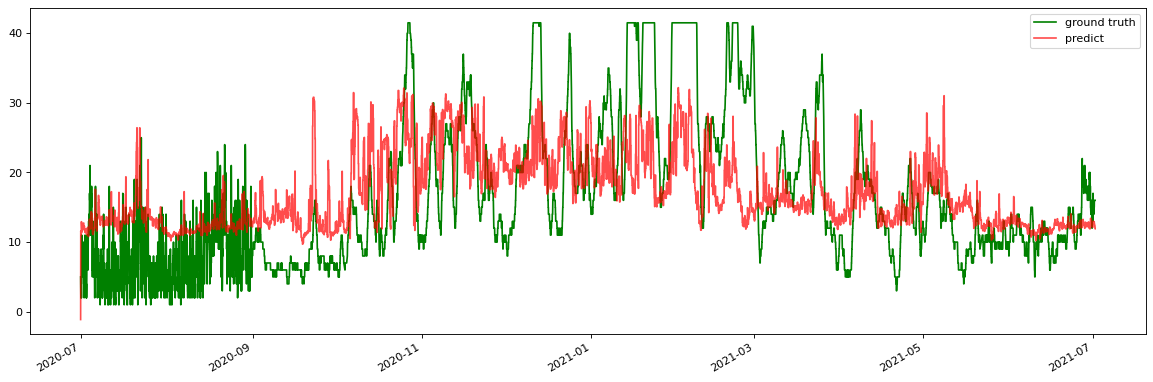

In [87]:
from matplotlib.pyplot import figure
figure(num=None, figsize=(18, 6), dpi=80, facecolor='w', edgecolor='k')
plt.plot(test['PM2.5'], color='g',label='ground truth')
pred.predicted_mean.plot(alpha=.7, color='r',label='predict')
plt.legend(loc="upper right")

plt.show()

In [88]:
import math

In [89]:
mse = mean_squared_error(test['PM2.5'], pred.predicted_mean)
rmse = math.sqrt(mse)
print('Test on SARIMAX with RMSE: %f' % (rmse, ))

Test on SARIMAX with RMSE: 8.541147


In [90]:
pred.predicted_mean.to_csv('Rayong.csv', index=True)